**Tahap 1 : Import Libraries**

Menempatkan berbagai macam library yang akan digunakan pada project ini.

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
import nltk
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer
import re
import time

**Tahap 2: Memasukkan Dataset**

Kita menggunakan dataset review film yang terdapat di website IMDB.

In [58]:
data = pd.read_csv('/content/sample_data/IMDB Dataset.csv')
data.head()

,review,sentiment
0,One of the other reviewers has mentioned that ...,positive
1,A wonderful little production. <br /><br />The...,positive
2,I thought this was a wonderful way to spend ti...,positive
3,Basically there's a family where a little boy ...,negative
4,"Petter Mattei's ""Love in the Time of Money"" is...",positive


**Tahap 3: Pre-proses Data**

Data teks akan dipersiapkan untuk *Model Training*. Tahap ini menghapus karakter yang tidak diinginkan, konversi teks menjadi lowercase, dan melemmatisasi kata.

In [59]:
nltk.download('stopwords')
nltk.download('wordnet')

def preprocess_text_optimized(text, lemmatizer, stop_words_set):
    text = re.sub(r'\W', ' ', text)  
    text = re.sub(r'\s+', ' ', text)  
    text = text.lower()  
    text = text.split()  
    text = [lemmatizer.lemmatize(word) for word in text if word not in stop_words_set]
    text = ' '.join(text)  
    return text

stop_words_set = set(stopwords.words('english'))
lemmatizer = WordNetLemmatizer()

start_time = time.time()
data['cleaned_review'] = data['review'].apply(preprocess_text_optimized, args=(lemmatizer, stop_words_set))
end_time = time.time()

preprocessing_time = end_time - start_time
print(f"Preprocessing completed in {preprocessing_time} seconds")


[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


Preprocessing completed in 42.01931881904602 seconds


**Tahap 4: Ekstraksi Fitur**

Di tahap ini program akan mengubah data teks yang telah dibersihkan menjadi nilai numerik agar dapat dibaca oleh model *machine learning*.

In [60]:
vectorizer = TfidfVectorizer(max_features=5000)
X = vectorizer.fit_transform(data['cleaned_review']).toarray()
y = data['sentiment']

**Tahap 5: Memecahkan Dataset**

Dataset dipecahkan menjadi bagian pelatihan dan pengujian untuk mengevaluasi performa model.

In [61]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

**Tahap 6: Pelatihan Model**

Penggolongan Naive Bayer dilatih menggunakan data pelatihan.

In [62]:
model = MultinomialNB()
model.fit(X_train, y_train)

MultinomialNB()

**Tahap 7 Evaluasi Model**

Performa model dievaluasi berdasarkan data hasil tes.

In [63]:
y_pred = model.predict(X_test)

print("Accuracy:", accuracy_score(y_test, y_pred))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))
print("Classification Report:\n", classification_report(y_test, y_pred))

Accuracy: 0.8565
Confusion Matrix:
 [[4209  752]
 [ 683 4356]]
Classification Report:
               precision    recall  f1-score   support

    negative       0.86      0.85      0.85      4961
    positive       0.85      0.86      0.86      5039

    accuracy                           0.86     10000
   macro avg       0.86      0.86      0.86     10000
weighted avg       0.86      0.86      0.86     10000



**Tahap 8: Visualisasi**

Performa data model divisualisasikan menggunakan *heatmap* matrix *confusion.*

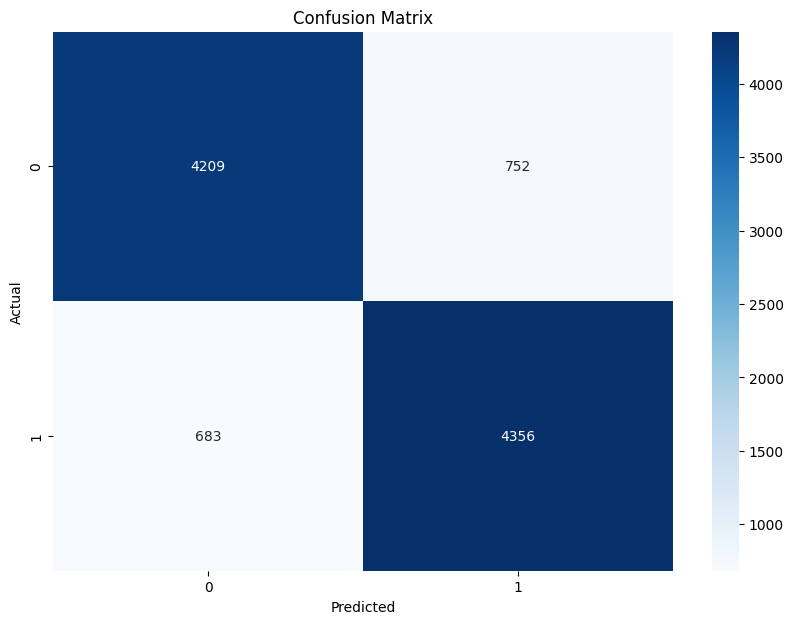

In [64]:
plt.figure(figsize=(10, 7))
sns.heatmap(confusion_matrix(y_test, y_pred), annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

**Tahap 9: Percobaan Model**

Model dapat digunakan untuk menilai apakah sebuah review memiliki konotasi atau perasaan yang negatif atau positif.

In [65]:
def predict_sentiment(review, model, vectorizer, lemmatizer, stop_words_set):
    cleaned_review = preprocess_text_optimized(review, lemmatizer, stop_words_set)
    review_vector = vectorizer.transform([cleaned_review]).toarray()
    prediction = model.predict(review_vector)
    return prediction[0]

user_review = input("Enter a movie review: ")

predicted_sentiment = predict_sentiment(user_review, model, vectorizer, lemmatizer, stop_words_set)
print(f"Predicted Sentiment: {predicted_sentiment}")


Enter a movie review: love it, one of my favourite from thomas gandolfini
Predicted Sentiment: positive
